In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.regularizers import l2
import pandas as pd
import numpy as np
import random
import time

2025-03-06 23:19:46.249949: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 23:19:46.643638: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### get cifar dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

### mlp archi

In [3]:
def define_sequantial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [4]:
model = define_sequantial_model()

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def training_sequantial_model(model, size):
    history = model.fit(x_train, y_train, epochs=50, batch_size=size, validation_data=(x_val, y_val))
    return history

In [7]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title(f'{title} - loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(f'{title} - accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

### train and validation set (20%)

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
x_train.shape

(40000, 32, 32, 3)

In [10]:
y_train.shape

(40000, 10)

In [11]:
x_val.shape

(10000, 32, 32, 3)

In [12]:
x_test.shape

(10000, 32, 32, 3)

### mini-batch SGD (batch_size = 128, learning_rate = 0.01, epochs = 50)

In [13]:
mini_sgd_model = define_sequantial_model()

mini_sgd_time_start = time.time()
mini_sgd_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_sgd_history = training_sequantial_model(mini_sgd_model, 128)
mini_sgd_time_end = time.time()

mini_sgd_time = mini_sgd_time_end - mini_sgd_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2004 - loss: 2.1755 - val_accuracy: 0.2909 - val_loss: 1.9432
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3281 - loss: 1.8994 - val_accuracy: 0.3461 - val_loss: 1.8402
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3641 - loss: 1.8144 - val_accuracy: 0.3531 - val_loss: 1.8104
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3817 - loss: 1.7620 - val_accuracy: 0.3817 - val_loss: 1.7592
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3908 - loss: 1.7314 - val_accuracy: 0.3894 - val_loss: 1.7135
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4029 - loss: 1.6963 - val_accuracy: 0.3890 - val_loss: 1.7260
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4138 - loss: 1.6700 - val_accuracy: 0.3945 - val_loss: 1.6964
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4243 - loss: 1.6478 - val_accuracy

### learning curves on train/validation set

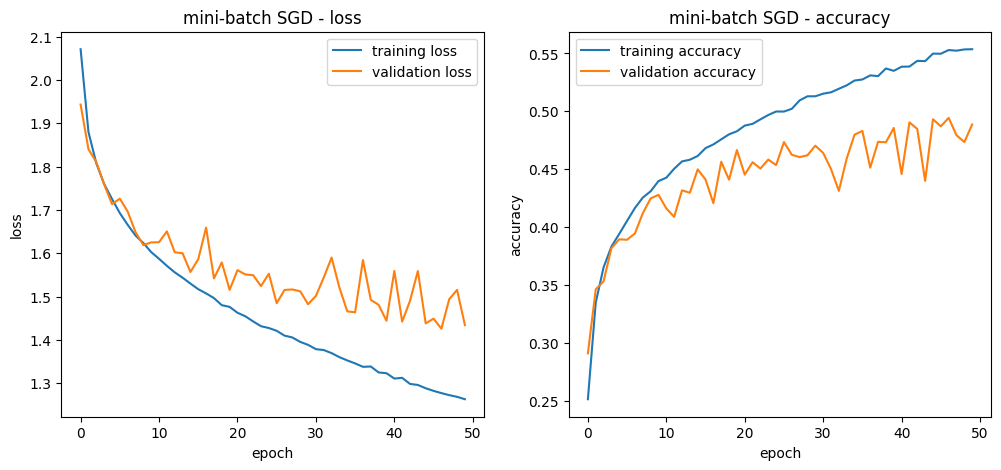

In [14]:
plot_learning_curves(mini_sgd_history, 'mini-batch SGD')

In [15]:
print('mini-batch sgd execution time:', mini_sgd_time)

mini-batch sgd execution time: 144.99516487121582


### L2 norm regularization

In [16]:
def define_l2_sequantial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(10, activation='softmax'))
    return model

In [17]:
mini_sgd_l2_model = define_l2_sequantial_model()

mini_sgd_l2_time_start = time.time()
mini_sgd_l2_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_sgd_l2_history = training_sequantial_model(mini_sgd_l2_model, 128)
mini_sgd_l2_time_end = time.time()

mini_sgd_l2_time = mini_sgd_l2_time_end - mini_sgd_l2_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2184 - loss: 2.9511 - val_accuracy: 0.3104 - val_loss: 2.6771
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3313 - loss: 2.6282 - val_accuracy: 0.3318 - val_loss: 2.5228
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3580 - loss: 2.4685 - val_accuracy: 0.3598 - val_loss: 2.4125
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3779 - loss: 2.3519 - val_accuracy: 0.3588 - val_loss: 2.3034
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3919 - loss: 2.2610 - val_accuracy: 0.3616 - val_loss: 2.2567
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4025 - loss: 2.1741 - val_accuracy: 0.3945 - val_loss: 2.1483
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4109 - loss: 2.1045 - val_accuracy: 0.4062 - val_loss: 2.0623
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4178 - loss: 2.0408 - val_accuracy:

### learning curves on train/validation set

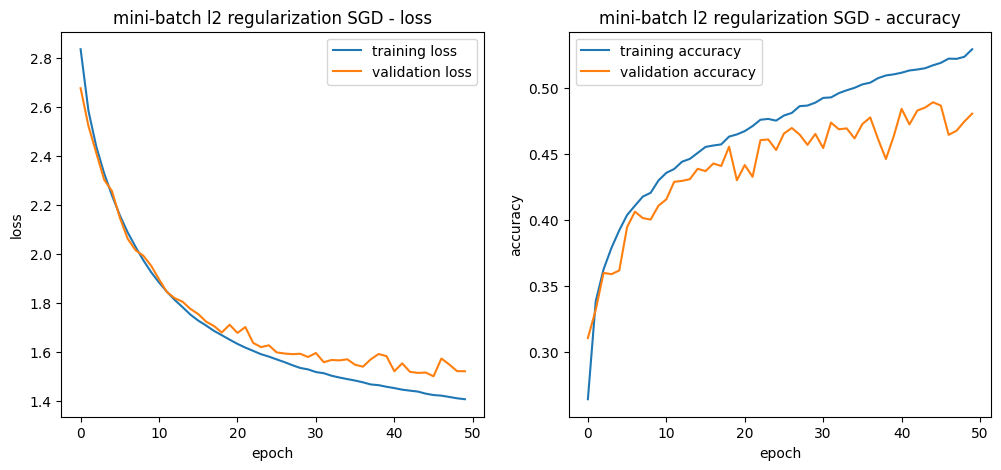

In [18]:
plot_learning_curves(mini_sgd_l2_history, 'mini-batch l2 regularization SGD')

In [19]:
print('mini-batch sgd regularization execution time:', mini_sgd_l2_time)

mini-batch sgd regularization execution time: 154.13867735862732


### comparaison

### dropout layer (rates 0.2, 0.3, 0.5)

In [20]:
def define_dropout_sequantial_model(dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3))) 
    model.add(Dense(128, activation='relu'))  
    model.add(Dense(64, activation='relu')) 
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax')) 
    return model

rate = 0.2

In [21]:
first_dropout_model = define_dropout_sequantial_model(dropout_rate=0.2)

first_dropout_time_start = time.time()
first_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
first_dropout_history = training_sequantial_model(first_dropout_model, 128)
first_dropout_time_end = time.time()

first_dropout_time = first_dropout_time_end - first_dropout_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1874 - loss: 2.1922 - val_accuracy: 0.3143 - val_loss: 1.9515
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2934 - loss: 1.9647 - val_accuracy: 0.3364 - val_loss: 1.8768
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3295 - loss: 1.8881 - val_accuracy: 0.3663 - val_loss: 1.8028
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3446 - loss: 1.8440 - val_accuracy: 0.3744 - val_loss: 1.7742
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3596 - loss: 1.8007 - val_accuracy: 0.3801 - val_loss: 1.7472
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3791 - loss: 1.7577 - val_accuracy: 0.3874 - val_loss: 1.7358
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3850 - loss: 1.7359 - val_accuracy: 0.4048 - val_loss: 1.6860
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3907 - loss: 1.7244 - val_accuracy:

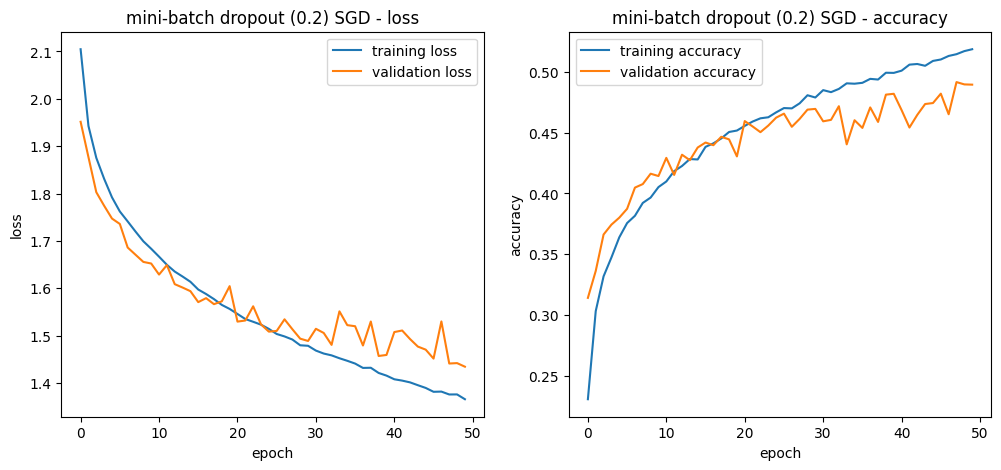

In [22]:
plot_learning_curves(first_dropout_history, 'mini-batch dropout (0.2) SGD')

In [23]:
print('mini-batch dropout (0.2) execution time:', first_dropout_time)

mini-batch dropout (0.2) execution time: 153.4909131526947


rate = 0.3

In [24]:
second_dropout_model = define_dropout_sequantial_model(dropout_rate=0.3)

second_dropout_time_start = time.time()
second_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
second_dropout_history = training_sequantial_model(second_dropout_model, 128)
second_dropout_time_end = time.time()

second_dropout_time = second_dropout_time_end - second_dropout_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1787 - loss: 2.2193 - val_accuracy: 0.2777 - val_loss: 2.0381
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2566 - loss: 2.0440 - val_accuracy: 0.3176 - val_loss: 1.9323
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2914 - loss: 1.9545 - val_accuracy: 0.3504 - val_loss: 1.8646
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3181 - loss: 1.9068 - val_accuracy: 0.3588 - val_loss: 1.8162
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3292 - loss: 1.8627 - val_accuracy: 0.3692 - val_loss: 1.7918
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3463 - loss: 1.8367 - val_accuracy: 0.3827 - val_loss: 1.7583
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3601 - loss: 1.8012 - val_accuracy: 0.3856 - val_loss: 1.7433
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3622 - loss: 1.7857 - val_accuracy:

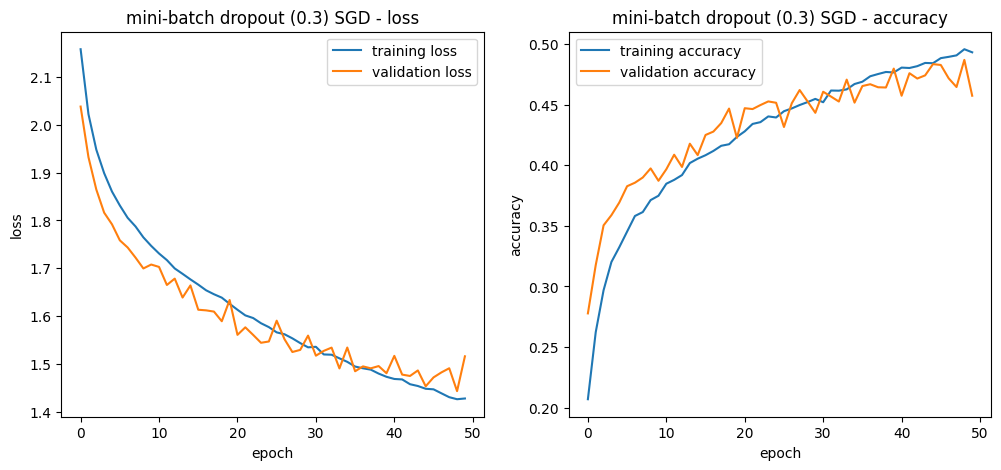

In [25]:
plot_learning_curves(second_dropout_history, 'mini-batch dropout (0.3) SGD')

In [26]:
print('mini-batch dropout (0.3) execution time:', second_dropout_time)

mini-batch dropout (0.3) execution time: 147.40608882904053


rate = 0.5

In [27]:
third_dropout_model = define_dropout_sequantial_model(dropout_rate=0.5)

third_dropout_time_start = time.time()
third_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
third_dropout_history = training_sequantial_model(third_dropout_model, 128)
third_dropout_time_end = time.time()

third_dropout_time = third_dropout_time_end - third_dropout_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1677 - loss: 2.2329 - val_accuracy: 0.2734 - val_loss: 2.0163
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2525 - loss: 2.0440 - val_accuracy: 0.3151 - val_loss: 1.9294
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2848 - loss: 1.9768 - val_accuracy: 0.3374 - val_loss: 1.8904
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3075 - loss: 1.9363 - val_accuracy: 0.3587 - val_loss: 1.8223
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3198 - loss: 1.8917 - val_accuracy: 0.3767 - val_loss: 1.8067
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3326 - loss: 1.8664 - val_accuracy: 0.3762 - val_loss: 1.7695
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3419 - loss: 1.8466 - val_accuracy: 0.3801 - val_loss: 1.7513
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3517 - loss: 1.8222 - val_accuracy: 0.

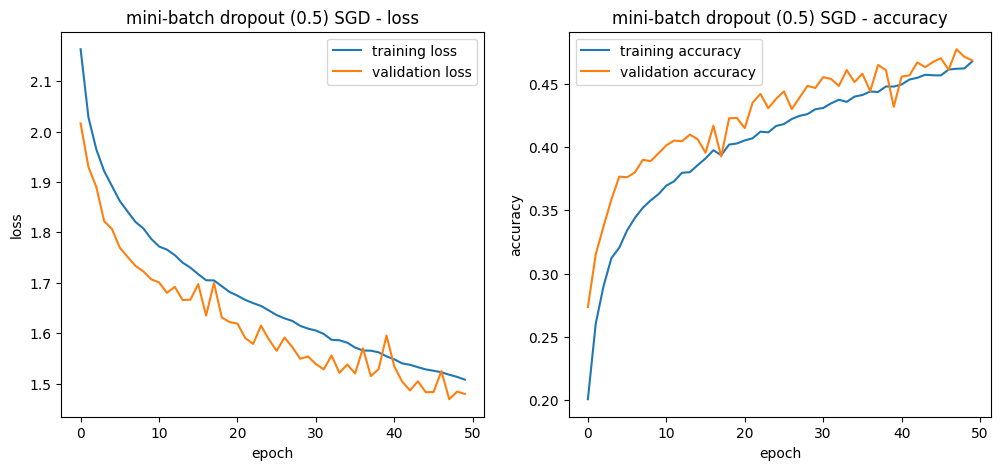

In [28]:
plot_learning_curves(third_dropout_history, 'mini-batch dropout (0.5) SGD')

In [29]:
print('mini-batch dropout (0.5) execution time:', third_dropout_time)

mini-batch dropout (0.5) execution time: 118.30062794685364


### comparaison

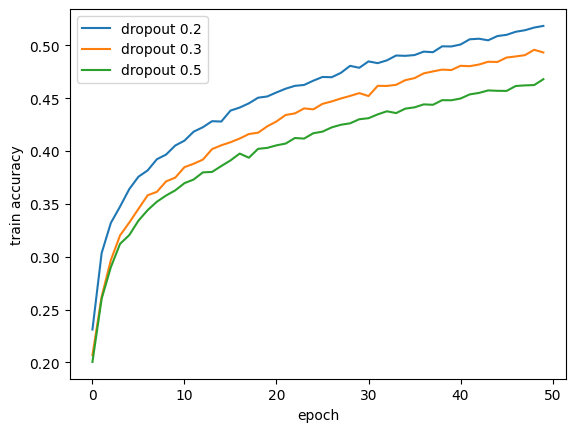

In [30]:
plt.plot(pd.DataFrame(first_dropout_history.history)[['accuracy']], label='dropout 0.2')
plt.plot(pd.DataFrame(second_dropout_history.history)[['accuracy']], label='dropout 0.3')
plt.plot(pd.DataFrame(third_dropout_history.history)[['accuracy']], label='dropout 0.5')

plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.legend()
plt.show()

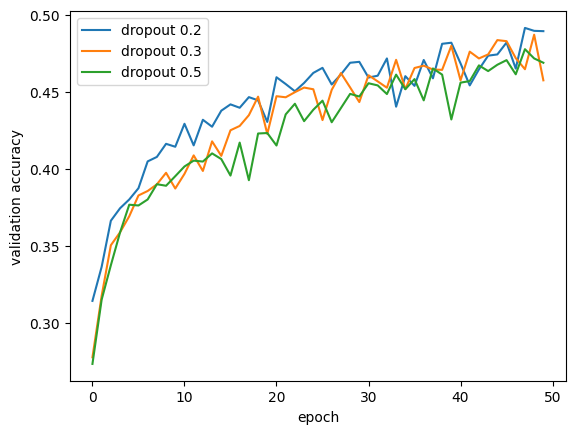

In [31]:
plt.plot(pd.DataFrame(first_dropout_history.history)[['val_accuracy']], label='dropout 0.2')
plt.plot(pd.DataFrame(second_dropout_history.history)[['val_accuracy']], label='dropout 0.3')
plt.plot(pd.DataFrame(third_dropout_history.history)[['val_accuracy']], label='dropout 0.5')

plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

### early stopping technique

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [33]:
dropout_early_stopping_time_start = time.time()
dropout_early_stopping_history = second_dropout_model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])
dropout_early_stopping_time_end = time.time()

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4933 - loss: 1.4206 - val_accuracy: 0.4847 - val_loss: 1.4554
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4953 - loss: 1.4176 - val_accuracy: 0.4645 - val_loss: 1.4869
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4996 - loss: 1.4080 - val_accuracy: 0.4953 - val_loss: 1.4308
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5061 - loss: 1.3977 - val_accuracy: 0.4747 - val_loss: 1.4797
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5011 - loss: 1.4048 - val_accuracy: 0.4770 - val_loss: 1.4631
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5025 - loss: 1.3993 - val_accuracy: 0.4915 - val_loss: 1.4322
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5034 - loss: 1.4014 - val_accuracy: 0.4946 - val_loss: 1.4278
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5072 - loss: 1.3884 - val_accuracy: 0.

In [34]:
print(f"training stopped at epoch {len(dropout_early_stopping_history.history['loss'])}")

training stopped at epoch 21


In [35]:
dropout_early_stopping_time = dropout_early_stopping_time_end - dropout_early_stopping_time_start
print(f"execution time: {dropout_early_stopping_time:.2f} seconds")

execution time: 49.29 seconds


### batch normalization layer

In [36]:
batch_normalization_model = Sequential()
batch_normalization_model.add(Flatten(input_shape=(32, 32, 3))) 
batch_normalization_model.add(Dense(128, activation='relu')) 
BatchNormalization()
batch_normalization_model.add(Dense(64, activation='relu')) 
batch_normalization_model.add(Dense(10, activation='softmax'))

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
batch_normalization_time_start = time.time()
batch_normalization_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
batch_normalization_history = training_sequantial_model(batch_normalization_model, 128)
batch_normalization_time_end = time.time()

batch_normalization_time = batch_normalization_time_end - batch_normalization_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2119 - loss: 2.1342 - val_accuracy: 0.2631 - val_loss: 2.0052
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3295 - loss: 1.8828 - val_accuracy: 0.3525 - val_loss: 1.8253
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3487 - loss: 1.8191 - val_accuracy: 0.3395 - val_loss: 1.8208
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3742 - loss: 1.7700 - val_accuracy: 0.3635 - val_loss: 1.7807
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3857 - loss: 1.7318 - val_accuracy: 0.3869 - val_loss: 1.7092
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4039 - loss: 1.6933 - val_accuracy: 0.4000 - val_loss: 1.6823
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4132 - loss: 1.6653 - val_accuracy: 0.3732 - val_loss: 1.7456
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4149 - loss: 1.6557 - val_accuracy: 0.

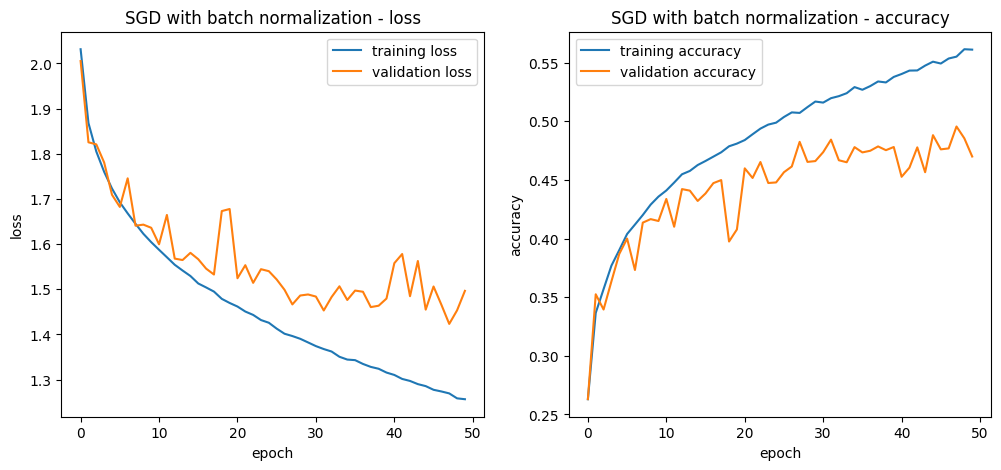

In [38]:
plot_learning_curves(batch_normalization_history, 'SGD with batch normalization')

In [39]:
print('SGD with batch normalization execution time:', batch_normalization_time)

SGD with batch normalization execution time: 126.70084071159363


### random search to find best hyperparameter

In [40]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
batch_sizes = [16, 32, 64, 128]

best_acc = 0
best_params = {}

In [41]:
def create_random_model(learning_rate, dropout_rate):
    model = Sequential()

    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    Dropout(dropout_rate)
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [42]:
for trial in range(5):
    
    __learning_rate = random.choice(learning_rates)
    __dropout_rate = random.choice(dropout_rates)
    __batch_size = random.choice(batch_sizes)
    
    print(f"trial {trial+1}: learning_rate={__learning_rate}, dropout_rate={__dropout_rate}, batch_size={__batch_size} \n")

    random_search_model = create_random_model(__learning_rate, __dropout_rate)

    random_search_model_history = random_search_model.fit(x_train, y_train, epochs=50, batch_size=__batch_size, validation_data=(x_val, y_val))
    
    val_acc = max(random_search_model_history.history['val_accuracy'])

    print(f"best validation accuracy: {val_acc:.4f} \n")

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = {'learning_rate': __learning_rate, 'dropout_rate': __dropout_rate, 'batch_size': __batch_size}

print("best hyper-parameters: ", best_params)


trial 1: learning_rate=0.005, dropout_rate=0.4, batch_size=32 

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2364 - loss: 2.8974 - val_accuracy: 0.3244 - val_loss: 2.5679
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3476 - loss: 2.4787 - val_accuracy: 0.3613 - val_loss: 2.3369
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3739 - loss: 2.2751 - val_accuracy: 0.3905 - val_loss: 2.1514
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3910 - loss: 2.1298 - val_accuracy: 0.3905 - val_loss: 2.0451
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4054 - loss: 2.0100 - val_accuracy: 0.4030 - val_loss: 1.9575
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4176 - loss: 1.9201 - val_accuracy: 0.4199 - val_loss: 1.8676
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4238 - loss: 1.8502 - val_accuracy: 0.4225 - val_loss: 1.8132
Epoch 8/50
1250/1250 ━━━━━

In [49]:
print("best validation accuracy: ", best_acc)

best validation accuracy:  0.5145999789237976
